`Support Vector Machine` (SVM) คือ โมเดลการเรียนรู้ที่สามารถใช้กับงานทางวิทยาศาสตร์ข้อมูลได้หลายประเภท คือ linear classification, non-linear classification, linear regression, non-linear regression, และ outlier detection

SVM เป็นโมเดลที่มีการใช้งานอย่างแพร่หลายมากที่สุดโมเดลหนึ่ง นักวิทยาศาสตร์ข้อมูลทุกคนจึงควรศึกษาและเรียนรู้การใช้งานของ SVM โมเดล SVM นี้เหมาะกับการจำแนกประเภทกรณีที่ชุดข้อมูลมีความซับซ้อนมาก และมีขนาดเล็กถึงขนาดกลาง

# Linear SVM Classification

แนวความคิดพื้นฐานของ SVM สามารถอธิบายได้ดังรูปที่ 1

![Large Margin Classification](ch08_fig1.png)
**รูปที่ 1 การจำแนกประเภทโดยใช้ขอบเขตขนาดใหญ่ (large margin classification)** (ภาพประกอบจาก แหล่งอ้างอิง [1])

รูปที่ 1 แสดง scatter plot ของแอทริบิวต์ `Petal length` และ `Petal width` ของดอกไอริส สปีชีส์ `Iris versiolor` และดอกไอริส สปีชีส์ `Iris setosa` ซึ่งจากรูปเห็นได้ชัดว่าข้อมูลนี้สามารถถูกแบ่งแยกได้ด้วยเส้นตรง (linearly separable) รูปทางด้านซ้ายแสดงเส้นขอบเขตการตัดสินใจ (decision boundary) ของโมเดลการเรียนรู้เชิงเส้น 3 โมเดล (เส้นสีแดง สีม่วง และเส้นประสีเขียว) ซึ่งจะเห็นได้ว่าโมเดลที่แทนด้วยเส้นประสีเขียวไม่สามารถจำแนกประเภทดอกไอริสสองสปีชีส์ออกจากกันได้ ส่วนโมเดลที่แทนด้วยเส้นสีแดงและสีม่วงนั้นสามารถจำแนกสปีชีส์ของดอกไอริสได้แต่ขอบเขตการตัดสินใจของทั้งสองโมเดลอยู่ใกล้กับจุดข้อมูลที่มีอยู่ในชุดข้อมูลนี้มาก ซึ่งมีผลเสียคือ หากมีข้อมูลใหม่เข้ามาโอกาสที่โมเดลจะทำนายผิดพลาดจะมีสูง 

ในทางตรงกันข้ามหากเราพิจารณา แผนภาพทางด้านขวาในรูปที่ 1 ซึ่งแสดงชุดข้อมูลชุดเดียวกันกับทางขวา แต่เส้นขอบเขตการตัดสินใจสีดำในรูปนี้ คือเส้นขอบเขตการตัดสินใจของ SVM จะเห็นได้ว่า เส้นขอบเขตการตัดสินใจของ SVM นั้นไม่เพียงแค่แบ่งชุดข้อมูลออกเป็นคลาส versicolor และคลาส setosa ได้แต่เส้นขอบเขตการตัดสินใจของ SVM ยังเป็นเส้นที่มีระยะทางมากที่สุดจากจุดข้อมูลในชุดข้อมูลฝึกฝนที่ใกล้ที่สุดอีกด้วย ซึ่งมีผลดีคือทำให้ SVM มีความทนทานต่อการเปลี่ยนแปลงของชุดข้อมูล กล่าวคือ ข้อมูลใหม่ที่เพิ่มขึ้นในชุดข้อมูลฝึกฝนมีโอกาสที่จะทำให้ขอบเขตการตัดสินใจเปลี่ยนแปลงไปได้น้อยลง

## Soft Margin Classification

หากเรากำหนดว่า จุดข้อมูลของคลาสเดียวกันจะต้องอยู่ในด้านเดียวกันของเส้นขอบเขตการตัดสินใจของ SVM ทั้งหมด เราจะเรียกโมเดลที่ได้ว่า `hard margin classification` ซึ่งมีข้อเสียสองประการคือ (1) `hard margin classification` จะใช้ได้เฉพาะกับชุดข้อมูลที่สามารถแบ่งแยกด้วยเส้นตรง (linearly separable) เท่านั้น และ (2) `hard margin classification` จะมีความอ่อนไหวกับ outlier หรือจุดข้อมูลที่ไม่เข้าพวก ดังแสดงในรูปที่ 2

![hard margin classifier sensitive to outlier](ch08_fig2.png)
**รูปที่ 2 `hard margin classifier` จะไม่สามารถจำแนกชุดข้อมูลแบบ non-linearly separable ได้ (ซ้าย) และจะทำงานผิดพลาดหากมี outlier หรือจุดที่ไม่เข้าพวก ในชุดข้อมูล** (ภาพประกอบจาก แหล่งอ้างอิง [1])

การแก้ไขปัญหาที่พบใน `hard margin SVM` ดังกล่าว สามารถทำได้โดยใช้ `soft margin classification` ซึ่งอนุญาตให้มีจุดข้อมูลอยู่ในด้านที่ไม่ถูกต้องของเส้นขอบเขตการตัดสินใจได้ (เรียกว่า margin violation) โดยจุดข้อมูลที่อยู่ในด้านที่ไม่ถูกต้องจะมีจำนวนได้มากน้อยเท่าใด สามารถกำหนดได้ด้วยไฮเปอร์พารามิเตอร์ `C` โดยที่ 
* เมื่อค่า `C` ต่ำ จะทำให้โมเดล SVM ที่ได้มี margin violation จำนวนมาก ส่งผลให้ได้ขนาดขอบเขตการตัดสินใจกว้าง (large margin) ซึ่งจะทำให้โมเดล SVM สามารถใช้กับข้อมูลใหม่ที่ไม่เคยพบมาก่อนได้ดี (better generalization to new unseen data) 

* เมื่อค่า `C` สูง จะทำให้โมเดล SVM ที่ได้มี margin violation จำนวนน้อย ส่งผลให้ได้ขนาดขอบเขตการตัดสินใจแคบ (narrow margin) ซึ่งจะทำให้โมเดลที่ได้มีความสามารถในการทำนายค่าของข้อมูลใหม่ที่ไม่เคยพบมาก่อนได้ไม่มากนัก

**หมายเหตุ** หากในการเทรน SVM พบว่าโมเดลเกิด overfit ขึ้น เราสามารถแก้ไขได้โดยปรับลดค่าไฮเปอร์พารามิเตอร์ `C` ให้น้อยลง

## ตัวอย่างการสร้างโมเดล Linear SVM ด้วย Scikit-Learn

### 1. การจำแนกประเภทดอกไอริสว่าเป็นสปีชีส์ Virginica หรือไม่ 

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 2).astype(np.float64) # iris virginica

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge')),
])
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

ทดลองใช้โมเดลที่ได้ทำนายสปีชีส์ของดอกไอริสที่มีค่า `petal length` เท่ากับ 5.5 และ `petal width` เท่ากับ 1.7

In [2]:
svm_clf.predict([[5.5, 1.7]])  # this is an iris virginica

array([1.])

### 2. การทำนายการเกิดฝนตกโดยใช้ชุดข้อมูล `weather` 

In [3]:
import pandas as pd
df = pd.read_csv('weather.csv')

df.head(3)

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal


In [4]:
# เปลี่ยน categorical feature Description ไปเป็นตัวเลขโดยใช้ `get_dummies`
df_dummies = pd.get_dummies(df, drop_first=True)

# สลับลำดับข้อมูล
from sklearn.utils import shuffle
df_shuffled = shuffle(df_dummies, random_state=42)

# แบ่งข้อมูลเป็น X , y
DV = 'Rain'
X = df_shuffled.drop(DV, axis=1)
y = df_shuffled[DV]

# แบ่งข้อมูลเป็น train/test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=42)

# scale ค่าของข้อมูลให้อยู่ในช่วงมาตรฐาน
from sklearn.preprocessing import StandardScaler
std_model = StandardScaler()
X_train_scaled = std_model.fit_transform(X_train)
X_test_scaled = std_model.transform(X_test)

# train model LinearSVC
from sklearn.svm import LinearSVC
svc_model = LinearSVC(C=1, loss='hinge')
svc_model.fit(X_train_scaled, y_train)

/anaconda3/envs/tsa/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/tsa/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/envs/tsa/lib/python3.7/site-packages/ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
/anaconda3/envs/tsa/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [5]:
y_predicted = svc_model.predict(X_test_scaled)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       383
           1       1.00      1.00      1.00      2917

   micro avg       1.00      1.00      1.00      3300
   macro avg       0.99      0.98      0.99      3300
weighted avg       1.00      1.00      1.00      3300



# Nonlinear SVM Classification

แม้ว่า soft margin linear SVM จะสามารถนำไปใช้งานกับข้อมูลแบบ non-linearly separable ได้ แต่ในกรณีที่ชุดข้อมูลมีความซับซ้อนมากจนไม่สามารถใช้เส้นขอบเขตแบบเส้นตรงของ soft margin linear SVM จำแนกได้ เราก็สามารถแก้ไขปัญหานี้ได้โดยการเพิ่มฟีเจอร์แบบ polynomial features เข้าไปในชุดข้อมูล ซึ่งในบางครั้งจะทำให้รูปร่างของมิติข้อมูลเปลี่ยนแปลงไปและสามารถจำแนกโดยใช้เส้นตรงได้ ดังตัวอย่างในรูปที่ 3

![adding polynomial features](ch08_fig3.png)
**รูปที่ 3 การเพิ่ม Polynomial features ทำให้จุดข้อมูลที่เรียงเป็นเส้นตรงในรูปทางด้านซ้าย เปลี่ยนเป็นจุดข้อมูลบนเส้นโค้งดังในรูปทางขวา ซึ่งสามารถแบ่งจุดข้อมูลออกเป็นกลุ่มสีเขียวและกลุ่มสีน้ำเงินได้โดยใช้เส้นตรง** (ภาพประกอบจาก แหล่งอ้างอิง [1])

ใน Scikit-Learn มีตัวแปลงฟีเจอร์โพลิโนเมียลอยู่ใน `sklearn.preprocessing.PolynomialFeatures` ตัวอย่างต่อไปจะเป็นการใช้ `PolynomialFeatures` เพิ่มฟีเจอร์ให้กับชุดข้อมูลแบบ `nonlinear` ที่ประกอบด้วยฟีเจอร์สองตัวคือ `X1` และ `X2` จากนั้นจึงสร้างโมเดลตัวจำแนกประเภท Linear SVM เพื่อทำนายค่าข้อมูลต่อไป

1. สร้างชุดข้อมูลแบบ `nonlinear` โดยใช้ฟังก์ชัน `make_moons`

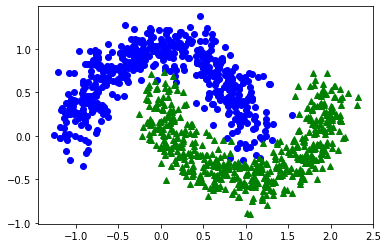

In [6]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.15)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X[:,0][y==0], X[:,1][y==0], marker='o', linestyle='', color='b')
plt.plot(X[:,0][y==1], X[:,1][y==1], marker='^', linestyle='', color='g')

2. ทดลองใช้ Linear SVM กับชุดข้อมูลแบบ `nonlinear` ที่ได้

In [7]:
# แบ่งข้อมูลเป็น train/test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=42)

# train model LinearSVC
from sklearn.svm import LinearSVC
svc_model = LinearSVC(C=1, loss='hinge')
svc_model.fit(X_train, y_train)

# evaluate performance
y_predicted = svc_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       159
           1       0.87      0.87      0.87       171

   micro avg       0.86      0.86      0.86       330
   macro avg       0.86      0.86      0.86       330
weighted avg       0.86      0.86      0.86       330



/anaconda3/envs/tsa/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


จะเห็นได้ว่าโมเดลที่ได้มีประสิทธิภาพประมาณ 86% ซึ่งสาเหตุหลักน่าจะมาจากการที่เราใช้โมเดลแบบเชิงเส้นกับชุดข้อมูลแบบไม่เชิงเส้น 

3. ต่อไปเราจะเพิ่มฟีเจอร์โพลีโนเมียลเข้าไปในชุดข้อมูลโดยใช้คลาส `PolynomialFeatures` จากนั้นจึงนำข้อมูลที่ได้ป้อนให้กับโมเดล Linear SVM (ใช้ X_train, X_test, y_train, y_test ที่ได้จากขั้นตอนที่ 2)

In [8]:
from sklearn.preprocessing import PolynomialFeatures

polyf = PolynomialFeatures(degree=3)
X_train_poly = polyf.fit_transform(X_train)
X_test_poly = polyf.transform(X_test)

svc_model = LinearSVC(C=1, loss='hinge')
svc_model.fit(X_train_poly, y_train)

# evaluate performance
y_poly_predicted = svc_model.predict(X_test_poly)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_poly_predicted))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       159
           1       0.97      0.99      0.98       171

   micro avg       0.98      0.98      0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



/anaconda3/envs/tsa/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Kernel Trick

การเพิ่ม Polynomial Features สามารถทำได้ง่ายและใช้ได้กับชุดข้อมูลที่มีความซับซ้อนปานกลาง ในกรณีที่ชุดข้อมูลมีความซับซ้อนสูง การเพิ่ม Polynomial Features จะทำให้เกิด combinatorial explosion ของจำนวนฟีเจอร์ ส่งผลให้การเรียนรู้ทำได้ยากขึ้นและโมเดลที่ได้ทำงานช้าลง 

เทคนิคที่เหมาะกับชุดข้อมูลมีความซับซ้อนสูงมาก คือการใช้ `kernel trick` กับ `SVM` `kernel trick` เป็นเทคนิคทางคณิตศาสตร์ ที่ทำให้เราสามารถได้ผลลัพธ์เช่นเดียวกันกับการเพิ่ม features จำนวนมากเข้าไปในชุดข้อมูลได้โดยไม่จำเป็นต้องคำนวณหาค่าฟีเจอร์เหล่านั้นจริงๆ (ก็คือไม่มีการเพิ่มฟีเจอร์เข้าไปจริงนั่นเอง) วิธีการ `kernel trick` นี้ได้ถูกรวมไว้ในคลาส `SVC` ของไลบารี่ Scikit-Learn 

ตัวอย่างการใช้โมเดล SVC โดยการกำหนดให้ kernel เป็นแบบ `linear`

In [9]:
from sklearn.svm import SVC
poly_kernel_svc = SVC(kernel='poly', degree=3, coef0=1, C=5)
poly_kernel_svc.fit(X_train, y_train)

y_poly_kernel_predicted = poly_kernel_svc.predict(X_test)
print(classification_report(y_test, y_poly_kernel_predicted))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       159
           1       0.97      0.99      0.98       171

   micro avg       0.98      0.98      0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



/anaconda3/envs/tsa/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


จะเห็นได้ว่าโมเดลที่ได้มีประสิทธิภาพเหมือนกันกับการใช้ `PolynomialFeatures` เพิ่มฟีเจอร์เข้าไปในชุดข้อมูล แต่ในกณีที่เราใช้ `Linear Kernel SVC` เราไม่จำเป็นต้องเพิ่มฟีเจอร์เข้าไปในชุดข้อมูลจริงๆ 

## Gaussian RBF Kernel

นอกจากการเพิ่มฟีเจอร์โดยใช้ polynomial terms อีกวิธีการหนึ่งในการเพิ่มฟีเจอร์ให้กับข้อมูลคือ การเพิ่มฟีเจอร์ที่คำนวณได้จากการหาค่าความคล้ายคลึงกันกับจุดสังเกตุหรือ landmark เช่น `Gaussian Radial Basis Function (RBF)` ซึ่งมีค่าดังสมการ

$\varphi(x, L) = e^{(-\gamma L^2)}$

ตัวอย่างเช่นรูปที่ 4 แสดงการเพิ่มฟีเจอร์โดยใช้ Gaussian RBF

![similarity featues with Gaussian RBF](ch08_fig4.png)
**รูปที่ 4 การเพิ่ม similarity features โดยใช้ Gaussian RBF** (ภาพประกอบจาก แหล่งอ้างอิง [1])


จากรูปที่ 4 ทางด้านซ้าย จุด landmark ที่ใช้เป็นจุดอ้างอิงในการวัดค่า similarity คือ จุด `x_1=-2` และจุด `x_1=1` ค่าของ `Gaussian RBF` เมื่อ landmark คือจุด `x_1=-2` แสดงดังเส้นโค้งประสีเขียว และ เมื่อ landmark คือจุด `x_1=1` แสดงดังเส้นโค้งประสีน้ำเงิน เราจะใช้ landmark `x_1=-2` เพื่อเพิ่มฟีเจอร์ `x_2` และ landmark `x_1=1` เพื่อเพิ่มฟีเจอร์ `x_3` 

ตัวอย่างการคำนวณค่าฟีเจอร์ $x_2$ และ $x_3$ ด้วย Gaussian RBF ตามสมการที่ให้ไว้ข้างต้นและกำหนดให้พารามิเตอร์ $\gamma=0.3$ เมื่อจุดข้อมูลคือ `x=-1` ซึ่งห่างจาก landmark `x_1=-2` เท่ากับ 1 หน่วย และห่างจาก landmark `x_1=1` เป็นระยะทาง 2 หน่วย ค่าฟีเจอร์ใหม่คำนวณได้ดังนี้คือ

$x_2 = \varphi(x=1, L=1) = e^{(-0.3 * 1^2)} \approx 0.74$

$x_3 = \varphi(x=1, L=2) = e^{(-0.3 * 2^2)} \approx 0.30$

เมื่อนำฟีเจอร์ใหม่ทั้งสองของแต่ละจุดข้อมูลมาพล็อตกราฟจะได้ผลลัพธ์เป็นชุดข้อมูลแบบ linearly separable ทางด้านขวาของรูปที่ 4

เช่นเดียวกันกับกรณีของ polynomial features เราสามารถใช้ `kernel trick` กับ SVM ได้ ซึ่งในไลบารี่ Scikit-Learn ได้เตรียม Gaussian RBF kernel ไว้ให้ใช้กับคลาส SVC ดังตัวอย่างต่อไปนี้

In [10]:
from sklearn.svm import SVC
rbf_kernel_svc = SVC(kernel='rbf', gamma=5, C=1000)
rbf_kernel_svc.fit(X_train, y_train)

rbf_kernel_predicted = rbf_kernel_svc.predict(X_test)
print(classification_report(y_test, rbf_kernel_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       159
           1       0.99      0.99      0.99       171

   micro avg       0.99      0.99      0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330



### เอกสารอ้างอิง

[1] Aurelien Geron. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow,
2ed, O'Reilly Media, Inc. 2019.

[2] Mohamed Noordeen Alaudeen; Rohan Chopra; Aaron England. Data Science with Python,
Packt Publishing, 2019.